In [2]:
%load_ext bigquery_magics

# "Will it snow tomorrow?" - The time traveler asked
The following dataset contains climate information from over 9000 stations accross the world. The overall goal of these subtasks will be to predict whether it will snow tomorrow 20 years ago. So if today is 1 April 2025 then the weather we want to forecast is for the 2 April 2005. You are supposed to solve the tasks using Big Query, which can be used in the Jupyter Notebook like it is shown in the following cell. For further information and how to use BigQuery in Jupyter Notebook refer to the Google Docs. 

The goal of this test is to test your coding knowledge in Python, BigQuery and Pandas as well as your understanding of Data Science. If you get stuck in the first part, you can use the replacement data provided in the second part.

In [3]:
%%bigquery
SELECT
*,
FROM `bigquery-public-data.samples.gsod`
LIMIT 20 


Query is running:   0%|          |

Downloading:   0%|          |

,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,37950,99999,1929,12,17,32.900002,4,30.200001,4,1039.199951,...,NaN,<NA>,0.0,NaN,True,True,True,True,True,True
1,33960,99999,1929,12,16,40.200001,4,35.700001,4,1033.800049,...,NaN,<NA>,0.0,NaN,False,False,False,False,False,False
2,30050,99999,1929,12,4,48.200001,4,43.700001,4,991.200012,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
3,37770,99999,1929,8,23,65.800003,4,58.700001,4,1018.599976,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
4,33960,99999,1929,12,29,46.500000,4,42.299999,4,NaN,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
5,39800,99999,1929,12,3,44.799999,4,39.700001,4,984.599976,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
6,38940,99999,1929,11,16,49.200001,4,46.299999,4,986.799988,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
7,33790,99999,1929,12,6,44.700001,4,40.299999,4,988.000000,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
8,30050,99999,1929,11,18,35.500000,4,31.500000,4,1016.000000,...,NaN,<NA>,0.0,NaN,False,False,False,False,False,False
9,38110,99999,1929,10,28,53.000000,4,49.200001,4,1009.799988,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False


## Part 1

### 1. Task
Change the date format to 'YYYY-MM-DD' and select the data from 2000 till 2005 for station numbers including and between 725300 and 726300 , and save it as a pandas dataframe. Note the maximum year available is 2010. 

In [4]:
%%bigquery df
SELECT
  *,
  CAST(
    CONCAT(
      CAST(year   AS STRING),
      "-",
      LPAD(CAST(month AS STRING), 2, "0"),
      "-",
      LPAD(CAST(day   AS STRING), 2, "0")
    ) AS DATE
  ) AS date
FROM
  `bigquery-public-data.samples.gsod`
WHERE
  year BETWEEN 2000 AND 2005
  AND station_number BETWEEN 725300 AND 726300


Query is running:   0%|          |

Downloading:   0%|          |

In [7]:
df.head()

,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado,date
0,725835,99999,2000,12,24,39.700001,4,26.100000,4,NaN,...,<NA>,0.0,NaN,False,False,False,False,False,False,2000-12-24
1,725835,99999,2000,11,17,31.100000,4,18.000000,4,NaN,...,<NA>,0.0,NaN,False,False,False,False,False,False,2000-11-17
2,725848,99999,2000,3,3,56.299999,4,44.599998,4,1024.000000,...,<NA>,0.0,NaN,False,False,False,False,False,False,2000-03-03
3,726079,99999,2000,7,25,68.000000,4,57.700001,4,NaN,...,<NA>,0.0,NaN,False,False,False,False,False,False,2000-07-25
4,725827,99999,2000,10,26,45.099998,4,23.000000,4,1008.099976,...,<NA>,0.0,NaN,False,False,False,False,False,False,2000-10-26


In [7]:
df.shape

(447037, 32)

In [8]:
df["station_number"].min(), df["station_number"].max()

(np.int64(725300), np.int64(726300))

### 2. Task 
From here you want to work with the data from all stations 725300 to 725330 that have information from 2000 till 2005. 

In [5]:
%%bigquery df_task2
SELECT
  *,
  CAST(
    CONCAT(
      CAST(year AS STRING),
      "-",
      LPAD(CAST(month AS STRING), 2, "0"),
      "-",
      LPAD(CAST(day AS STRING), 2, "0")
    ) AS DATE
  ) AS date
FROM
  `bigquery-public-data.samples.gsod`
WHERE
  year BETWEEN 2000 AND 2005
  AND station_number BETWEEN 725300 AND 725330


Query is running:   0%|          |

Downloading:   0%|          |

In [13]:
print("Station Number Range:", df_task2["station_number"].min(), "to", df_task2["station_number"].max())
print("Year Range:", df_task2["year"].min(), "to", df_task2["year"].max())
print("Shape of DataFrame:", df_task2.shape)

Station Number Range: 725300 to 725330
Year Range: 2000 to 2005
Shape of DataFrame: (21853, 32)


In [27]:
# col names 
df_task2.columns

Index(['station_number', 'wban_number', 'year', 'month', 'day', 'mean_temp',
       'num_mean_temp_samples', 'mean_dew_point', 'num_mean_dew_point_samples',
       'mean_sealevel_pressure', 'num_mean_sealevel_pressure_samples',
       'mean_station_pressure', 'num_mean_station_pressure_samples',
       'mean_visibility', 'num_mean_visibility_samples', 'mean_wind_speed',
       'num_mean_wind_speed_samples', 'max_sustained_wind_speed',
       'max_gust_wind_speed', 'max_temperature', 'max_temperature_explicit',
       'min_temperature', 'min_temperature_explicit', 'total_precipitation',
       'snow_depth', 'fog', 'rain', 'snow', 'hail', 'thunder', 'tornado',
       'date'],
      dtype='object')

Start by checking which year received the most snowfall in our data. 

In [42]:
%%bigquery
SELECT
  year,
  SUM(COALESCE(snow_depth, 0)) AS total_snow_depth
FROM
  `bigquery-public-data.samples.gsod`
WHERE
  station_number BETWEEN 725300 AND 725330
  AND year BETWEEN 2000 AND 2005
  AND snow = TRUE     -- only days where snow actually occurred
GROUP BY
  year
ORDER BY
  total_snow_depth DESC
LIMIT 1



Query is running:   0%|          |

Downloading:   0%|          |

,year,total_snow_depth
0,2000,714.700004


Add an additional field that indicates the daily change in snow depth measured at every station. And identify the station and day for which the snow depth increased the most.  

In [6]:
%%bigquery
SELECT
  station_number,
  DATE(CONCAT(CAST(year AS STRING), '-', LPAD(CAST(month AS STRING), 2, '0'), '-', LPAD(CAST(day AS STRING), 2, '0'))) AS date,
  snow_depth,
  snow_depth - LAG(snow_depth) OVER (
    PARTITION BY station_number
    ORDER BY year, month, day
  ) AS daily_snow_depth_change
FROM
  `bigquery-public-data.samples.gsod`
WHERE
  year BETWEEN 2000 AND 2005
  AND station_number BETWEEN 725300 AND 726300
  AND snow = TRUE
ORDER BY
  daily_snow_depth_change DESC
LIMIT 1;


Query is running:   0%|          |

Downloading:   0%|          |

,station_number,date,snow_depth,daily_snow_depth_change
0,725846,2005-01-12,53.900002,51.900002


In [7]:
df_task2.to_csv("gsod_data.csv", index=False)

Do further checks on the remaining dataset, clean or drop data depending on how you see appropriate. 

In [9]:
df_task2.shape

(21853, 32)

In [8]:
df_task2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21853 entries, 0 to 21852
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   station_number                      21853 non-null  Int64  
 1   wban_number                         21853 non-null  Int64  
 2   year                                21853 non-null  Int64  
 3   month                               21853 non-null  Int64  
 4   day                                 21853 non-null  Int64  
 5   mean_temp                           21853 non-null  float64
 6   num_mean_temp_samples               21853 non-null  Int64  
 7   mean_dew_point                      21846 non-null  float64
 8   num_mean_dew_point_samples          21846 non-null  Int64  
 9   mean_sealevel_pressure              19266 non-null  float64
 10  num_mean_sealevel_pressure_samples  19266 non-null  Int64  
 11  mean_station_pressure               1599 

In [11]:
df_task2.columns

Index(['station_number', 'wban_number', 'year', 'month', 'day', 'mean_temp',
       'num_mean_temp_samples', 'mean_dew_point', 'num_mean_dew_point_samples',
       'mean_sealevel_pressure', 'num_mean_sealevel_pressure_samples',
       'mean_station_pressure', 'num_mean_station_pressure_samples',
       'mean_visibility', 'num_mean_visibility_samples', 'mean_wind_speed',
       'num_mean_wind_speed_samples', 'max_sustained_wind_speed',
       'max_gust_wind_speed', 'max_temperature', 'max_temperature_explicit',
       'min_temperature', 'min_temperature_explicit', 'total_precipitation',
       'snow_depth', 'fog', 'rain', 'snow', 'hail', 'thunder', 'tornado',
       'date'],
      dtype='object')

In [12]:
# Drop metadata or count-based columns that reflect measurement counts or flags, 
# as they do not contribute directly to snow prediction.

cols_to_drop = [
    'num_mean_temp_samples',
    'num_mean_dew_point_samples',
    'num_mean_sealevel_pressure_samples',
    'num_mean_station_pressure_samples',
    'num_mean_visibility_samples',
    'num_mean_wind_speed_samples'
]

# drop 
df_cleaned = df_task2.drop(columns=cols_to_drop)

In [14]:
# save as csv
df_cleaned.to_csv("gsod_data_cleaned.csv", index=False)

### 3. Task
Now it is time to split the data, into a training, evaluation and test set. As a reminder, the date we are trying to predict snow fall for should constitute your test set.

In [1]:
import datetime as dt

str(dt.datetime.today()- dt.timedelta(days=20*365)).split(' ')[0]

'2005-06-10'

In [1]:
import pandas as pd
df = pd.read_csv("gsod_data_cleaned.csv")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21853 entries, 0 to 21852
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   station_number            21853 non-null  int64  
 1   wban_number               21853 non-null  int64  
 2   year                      21853 non-null  int64  
 3   month                     21853 non-null  int64  
 4   day                       21853 non-null  int64  
 5   mean_temp                 21853 non-null  float64
 6   mean_dew_point            21846 non-null  float64
 7   mean_sealevel_pressure    19266 non-null  float64
 8   mean_station_pressure     1599 non-null   float64
 9   mean_visibility           21837 non-null  float64
 10  mean_wind_speed           21846 non-null  float64
 11  max_sustained_wind_speed  21845 non-null  float64
 12  max_gust_wind_speed       12388 non-null  float64
 13  max_temperature           21852 non-null  float64
 14  max_te

### Data Porcessing and Train/Test Split

## Part 2
If you made it up to here all by yourself, you can use your prepared dataset to train an algorithm of your choice to forecast whether it will snow on the following date for each station in this dataset:

In [ ]:
import datetime as dt

str(dt.datetime.today()- dt.timedelta(days=20*365)).split(' ')[0]

You are allowed to use any library you are comfortable with such as sklearn, tensorflow, keras etc. 
If you did not manage to finish part one feel free to use the data provided in 'coding_challenge.csv' Note that this data does not represent a solution to Part 1. 

In [ ]:
# --- Data Handling ---
import pandas as pd
import numpy as np
import datetime as dt

# --- Visualization ---
import seaborn as sns
import matplotlib.pyplot as plt

# --- Preprocessing ---
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# --- Model Selection & Evaluation ---
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, GridSearchCV
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve,
    f1_score,
    make_scorer
)

# --- Models ---
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# --- Warnings ---
import warnings
warnings.filterwarnings('ignore')

In [149]:
df = pd.read_csv("gsod_data_cleaned.csv")
df.head()

,station_number,wban_number,year,month,day,mean_temp,mean_dew_point,mean_sealevel_pressure,mean_station_pressure,mean_visibility,...,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado,date
0,725327,99999,2000,3,17,31.000000,20.900000,1028.300049,NaN,10.0,...,NaN,0.00,NaN,False,False,False,False,False,False,2000-03-17
1,725326,99999,2000,12,6,13.700000,2.400000,NaN,NaN,9.7,...,NaN,0.00,NaN,False,False,False,False,False,False,2000-12-06
2,725316,99999,2000,5,12,76.800003,69.400002,NaN,NaN,6.5,...,NaN,NaN,NaN,False,False,False,False,False,False,2000-05-12
3,725317,99999,2000,8,26,70.300003,66.400002,1013.200012,NaN,6.9,...,NaN,0.13,NaN,False,False,False,False,False,False,2000-08-26
4,725305,99999,2000,9,15,55.400002,41.799999,1019.700012,NaN,10.0,...,NaN,0.02,NaN,False,False,False,False,False,False,2000-09-15


In [73]:
df.columns

Index(['station_number', 'wban_number', 'year', 'month', 'day', 'mean_temp',
       'mean_dew_point', 'mean_sealevel_pressure', 'mean_station_pressure',
       'mean_visibility', 'mean_wind_speed', 'max_sustained_wind_speed',
       'max_gust_wind_speed', 'max_temperature', 'max_temperature_explicit',
       'min_temperature', 'min_temperature_explicit', 'total_precipitation',
       'snow_depth', 'fog', 'rain', 'snow', 'hail', 'thunder', 'tornado',
       'date'],
      dtype='object')

In [87]:
print("Columns with NaN values:")
print(df.isna().sum()[df.isna().sum() > 0])

Columns with NaN values:
mean_dew_point                  7
mean_sealevel_pressure       2587
mean_station_pressure       20254
mean_visibility                16
mean_wind_speed                 7
max_sustained_wind_speed        8
max_gust_wind_speed          9465
max_temperature                 1
max_temperature_explicit        1
min_temperature             21853
min_temperature_explicit    21853
total_precipitation           296
snow_depth                  20985
dtype: int64



## 📄 Understanding Missing Values in NOAA GSOD Dataset

According to the [NOAA GSOD documentation](https://www.ncei.noaa.gov/pub/data/gsod/readme.txt):

* **Total Precipitation (`total_precipitation`)**:

  * **Missing Value Indicator**: `99.99`
  * **Interpretation**: Many stations do not report '0' on days with no precipitation; thus, `99.99` often appears on such days.
  * **Action**: Impute missing values (`99.99`) with `0.0`, indicating no precipitation.

* **Snow Depth (`snow_depth`)**:

  * **Missing Value Indicator**: `999.9`
  * **Interpretation**: Most stations do not report '0' on days with no snow on the ground; therefore, `999.9` will often appear on these days.
  * **Action**: Impute missing values (`999.9`) with `0.0`, indicating no snow on the ground.([ncei.noaa.gov][1])



### 🛠️ Data Preprocessing 

1. Convert Missing Value Indicators to NaN:

In [150]:
df['total_precipitation'] = df['total_precipitation'].replace(99.99, np.nan)
df['snow_depth'] = df['snow_depth'].replace(999.9, np.nan)

2. Impute Missing Values:

In [151]:
df['total_precipitation'] = df['total_precipitation'].fillna(0.0)
df['snow_depth'] = df['snow_depth'].fillna(0.0)


3. Combine Temperature Columns:

In [152]:
# Combine min and max temperature values
df['max_temperature_combined'] = df['max_temperature'].combine_first(df['max_temperature_explicit'])

4. drop columns ´

In [ ]:
# Drop leaky or unnecessary columns
df.drop(columns=[
    'max_temperature',
    'max_temperature_explicit',
    'mean_station_pressure',           # too many NaNs
    'snow_depth',                       # possible leakage
    'min_temperature',                 # all NaNs
    'min_temperature_explicit',        # all NaNs
    'year', 
    'month', 
    'day'
], inplace=True)
 

### Feature Engineering

In [153]:
# Convert and sort dates, shift target to predict next-day snow per station, 
# and create cyclical features to capture seasonal patterns


df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by=['station_number', 'date'])

# Shift target snow to next day per station
df['snow_tomorrow'] = df.groupby('station_number')['snow'].shift(-1)
df = df.dropna(subset=['snow_tomorrow'])

df['snow_tomorrow'] = df['snow_tomorrow'].astype(int)

# Extract date parts
df['month'] = df['date'].dt.month
df['day_of_year'] = df['date'].dt.dayofyear
df['weekday'] = df['date'].dt.weekday

# Create cyclical date features
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

df['day_of_year_sin'] = np.sin(2 * np.pi * df['day_of_year'] / 365)
df['day_of_year_cos'] = np.cos(2 * np.pi * df['day_of_year'] / 365)

df['weekday_sin'] = np.sin(2 * np.pi * df['weekday'] / 7)
df['weekday_cos'] = np.cos(2 * np.pi * df['weekday'] / 7)

print(f"Data shape after preparation: {df.shape}")
df.head()


Data shape after preparation: (21843, 28)


,station_number,wban_number,mean_temp,mean_dew_point,mean_sealevel_pressure,mean_visibility,mean_wind_speed,max_sustained_wind_speed,max_gust_wind_speed,total_precipitation,...,snow_tomorrow,month,day_of_year,weekday,month_sin,month_cos,day_of_year_sin,day_of_year_cos,weekday_sin,weekday_cos
3795,725300,94846,38.400002,29.700001,1015.700012,9.8,6.8,13.0,20.0,0.00,...,1,1,1,5,0.5,0.866025,0.017213,0.999852,-0.974928,-0.222521
6807,725300,94846,47.799999,42.299999,1006.400024,7.7,10.2,21.0,28.9,0.01,...,1,1,2,6,0.5,0.866025,0.034422,0.999407,-0.781831,0.623490
3805,725300,94846,37.500000,34.099998,1011.099976,7.2,11.3,18.1,26.0,0.01,...,1,1,3,0,0.5,0.866025,0.051620,0.998667,0.000000,1.000000
5079,725300,94846,29.700001,25.900000,1008.700012,7.0,12.3,19.0,22.9,0.25,...,1,1,4,1,0.5,0.866025,0.068802,0.997630,0.781831,0.623490
2688,725300,94846,20.400000,16.500000,1025.199951,8.7,8.1,12.0,16.9,0.00,...,0,1,5,2,0.5,0.866025,0.085965,0.996298,0.974928,-0.222521


### Data Analysis

In [217]:
# check for cols with missing values

print("Columns with NaN values:")
print(df.isna().sum()[df.isna().sum() > 0])

Columns with NaN values:
mean_dew_point                 7
mean_sealevel_pressure      2586
mean_visibility               16
mean_wind_speed                7
max_sustained_wind_speed       8
max_gust_wind_speed         9464
max_temperature_combined       1
dtype: int64


In [118]:
# check for ratio of target column in dataset (snow/no snow)

pd.crosstab(index=df['snow'], columns='count', normalize=True)

col_0,count
snow,
False,0.819668
True,0.180332


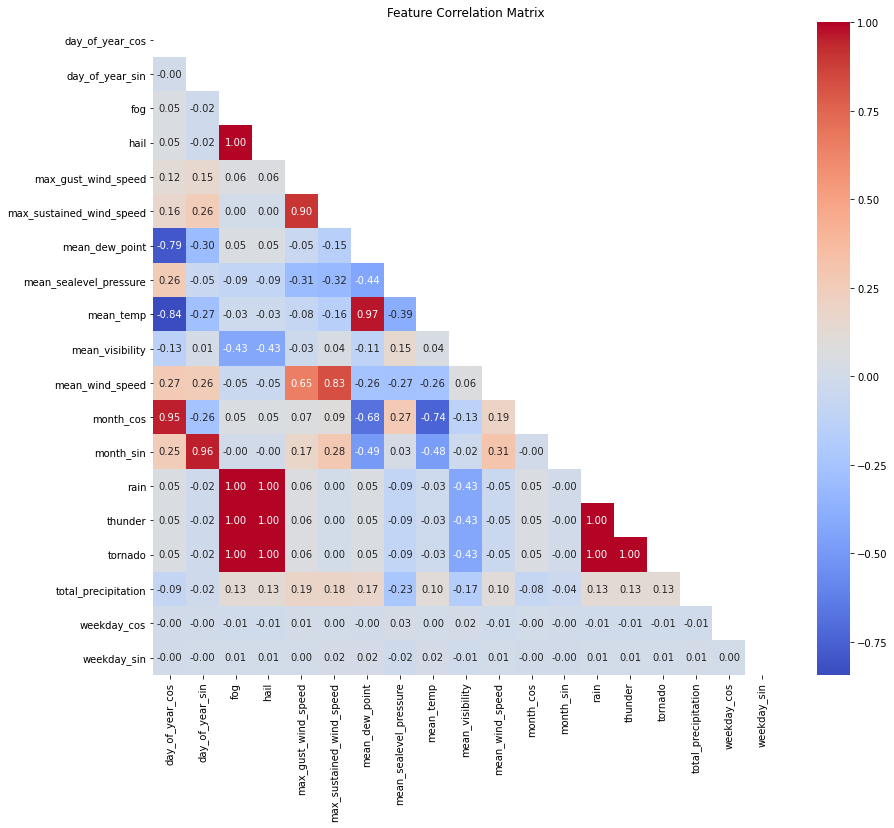

Highly correlated pairs (|corr| > 0.9):
                 level_0                   level_1  correlation
10       day_of_year_cos                 month_cos     0.954695
28       day_of_year_sin                 month_sin     0.955006
35                   fog                      hail     1.000000
45                   fog                      rain     1.000000
46                   fog                   thunder     1.000000
47                   fog                   tornado     1.000000
60                  hail                      rain     1.000000
61                  hail                   thunder     1.000000
62                  hail                   tornado     1.000000
66   max_gust_wind_speed  max_sustained_wind_speed     0.900108
94        mean_dew_point                 mean_temp     0.966225
156                 rain                   thunder     1.000000
157                 rain                   tornado     1.000000
161              thunder                   tornado     1.000000


In [108]:
# check for collinearity between independent columns

exclude_cols = ['snow', 'snow_tomorrow', 'date', 'station_number', 'wban_number', 
                'month', 'day_of_year', 'weekday']  # exclude original date cols

feature_cols = df.columns.difference(exclude_cols).tolist()

# Correlation matrix
corr_matrix = df[feature_cols].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(14,12))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Feature Correlation Matrix")
plt.show()

# Find pairs with high correlation > 0.9
high_corr = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                        .stack()
                        .reset_index()
                        .rename(columns={0:'correlation'}))

high_corr = high_corr[high_corr['correlation'].abs() > 0.9]
print("Highly correlated pairs (|corr| > 0.9):")
print(high_corr)


In [154]:
drop_cols = [
    'station_number',
    'wban_number',
    'snow',  # current day snowfall can leak info for tomorrow
]

df = df.drop(columns=drop_cols)

In [155]:
df.columns

Index(['mean_temp', 'mean_dew_point', 'mean_sealevel_pressure',
       'mean_visibility', 'mean_wind_speed', 'max_sustained_wind_speed',
       'max_gust_wind_speed', 'total_precipitation', 'fog', 'rain', 'hail',
       'thunder', 'tornado', 'date', 'max_temperature_combined',
       'snow_tomorrow', 'month', 'day_of_year', 'weekday', 'month_sin',
       'month_cos', 'day_of_year_sin', 'day_of_year_cos', 'weekday_sin',
       'weekday_cos'],
      dtype='object')

In [156]:
df.shape

(21843, 25)

### Train/Test Split

In [158]:
import datetime as dt
import pandas as pd

# Define cutoff date
test_cutoff_date = pd.to_datetime(str(dt.datetime.today() - dt.timedelta(days=20 * 365))).normalize()
print("Test set cutoff date:", test_cutoff_date)

# Split before dropping 'date'
train_val_df = df[df['date'] < test_cutoff_date].copy()
test_df      = df[df['date'] >= test_cutoff_date].copy()

# Now drop leakage columns
drop_cols = ['date']
train_val_df.drop(columns=drop_cols, inplace=True)
test_df.drop(columns=drop_cols, inplace=True)

# Define X and y
X_train_val = train_val_df.drop(columns=['snow_tomorrow'])
y_train_val = train_val_df['snow_tomorrow']

X_test = test_df.drop(columns=['snow_tomorrow'])
y_test = test_df['snow_tomorrow']

print("X_train_val:", X_train_val.shape)
print("y_train_val:", y_train_val.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)


Test set cutoff date: 2005-06-12 00:00:00
X_train_val: (19824, 23)
y_train_val: (19824,)
X_test: (2019, 23)
y_test: (2019,)


In [160]:
print(X_train_val.isnull().sum())  

mean_temp                      0
mean_dew_point                 7
mean_sealevel_pressure      2379
mean_visibility               16
mean_wind_speed                7
max_sustained_wind_speed       7
max_gust_wind_speed         8486
total_precipitation            0
fog                            0
rain                           0
hail                           0
thunder                        0
tornado                        0
max_temperature_combined       1
month                          0
day_of_year                    0
weekday                        0
month_sin                      0
month_cos                      0
day_of_year_sin                0
day_of_year_cos                0
weekday_sin                    0
weekday_cos                    0
dtype: int64


### Handling missing values with pipeline imputing techniques

In [166]:
# Columns to process
median_fill_cols = [
    'mean_dew_point',
    'mean_sealevel_pressure',
    'mean_visibility',
    'mean_wind_speed',
    'max_sustained_wind_speed',
    'max_gust_wind_speed',
    'max_temperature_combined'
]

zero_fill_cols = [
    'total_precipitation'
]

# Preprocessor
preprocessor = ColumnTransformer([
    ('median_impute', SimpleImputer(strategy='median'), median_fill_cols),
    ('zero_impute', SimpleImputer(strategy='constant', fill_value=0), zero_fill_cols)
], remainder='passthrough')  # Other columns go through as-is


#### check how pipeline is working

In [168]:

# Apply preprocessing pipeline only
X_processed = preprocessor.fit_transform(X_train_val)

# Convert to DataFrame to check easily
# Note: 'remainder="passthrough"' means some columns remain as-is, so get feature names properly if needed.
X_processed_df = pd.DataFrame(X_processed, columns=median_fill_cols + zero_fill_cols + [col for col in X_train_val.columns if col not in median_fill_cols + zero_fill_cols])

# Check for any NaNs left
print("Number of missing values after preprocessing:")
print(X_processed_df.isnull().sum())



Number of missing values after preprocessing:
mean_dew_point              0
mean_sealevel_pressure      0
mean_visibility             0
mean_wind_speed             0
max_sustained_wind_speed    0
max_gust_wind_speed         0
max_temperature_combined    0
total_precipitation         0
mean_temp                   0
fog                         0
rain                        0
hail                        0
thunder                     0
tornado                     0
month                       0
day_of_year                 0
weekday                     0
month_sin                   0
month_cos                   0
day_of_year_sin             0
day_of_year_cos             0
weekday_sin                 0
weekday_cos                 0
dtype: int64


it is working fine

### Model Training

In [172]:
# --- 3. Model Pipelines ---

# Logistic Regression pipeline (needs scaling)
logreg_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000, solver='saga', random_state=42,class_weight='balanced'))
])

# Random Forest pipeline (no scaling)
rf_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced'))
])

# XGBoost pipeline (no scaling)
xgb_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

In [ ]:
# TimeSeriesSplit (e.g., 5 splits)
tscv = TimeSeriesSplit(n_splits=5)

#  F1 score as the evaluation metric
scorer = make_scorer(f1_score)

models = [
    ('Logistic Regression', logreg_pipeline),
    ('Random Forest', rf_pipeline),
    ('XGBoost', xgb_pipeline)
]

for name, pipeline in models:
    scores = cross_val_score(pipeline, X_train_val, y_train_val, cv=tscv, scoring=scorer)
    print(f"📌 {name} F1 Scores: {scores}")
    print(f"✅ {name} Mean F1 Score: {scores.mean():.4f}\n")


📌 Logistic Regression F1 Scores: [0.19143577 0.22065728 0.57654723 0.40776699 0.64225849]
✅ Logistic Regression Mean F1 Score: 0.4077

📌 Random Forest F1 Scores: [0.19211823 0.18118467 0.32472325 0.4        0.43076923]
✅ Random Forest Mean F1 Score: 0.3058

📌 XGBoost F1 Scores: [0.19636364 0.16722408 0.37617021 0.40932642 0.48466627]
✅ XGBoost Mean F1 Score: 0.3268



#### What metric should be focused

1. Best Metric for  Task
    Since snow tomorrow (1) is the minority class and catching it is important (because missing a snow day could be costly or critical),  focus should be on:

    * F1-score (especially the positive class, aka F1 for class 1) — balances precision and recall for snow days.

    * Recall — measures how many actual snow days you caught.

    * Precision — how many predicted snow days were correct.

    * ROC AUC — gives overall separability, useful to see the model’s ranking ability.

    * Accuracy is less useful because the data is imbalanced (mostly no snow days).

##### Since logistic regression is performing well lets foucs on this model

In [174]:
# choose your best model here
logreg_pipeline.fit(X_train_val, y_train_val)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('median_impute',
                                                  SimpleImputer(strategy='median'),
                                                  ['mean_dew_point',
                                                   'mean_sealevel_pressure',
                                                   'mean_visibility',
                                                   'mean_wind_speed',
                                                   'max_sustained_wind_speed',
                                                   'max_gust_wind_speed',
                                                   'max_temperature_combined']),
                                                 ('zero_impute',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant'),
      

              precision    recall  f1-score   support

           0     0.8589    0.8589    0.8589      1573
           1     0.5022    0.5022    0.5022       446

    accuracy                         0.7801      2019
   macro avg     0.6806    0.6806    0.6806      2019
weighted avg     0.7801    0.7801    0.7801      2019



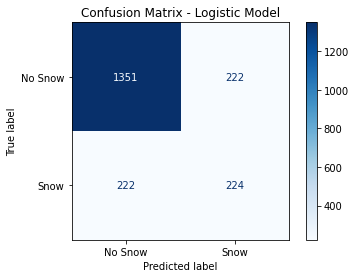

ROC AUC Score: 0.7304


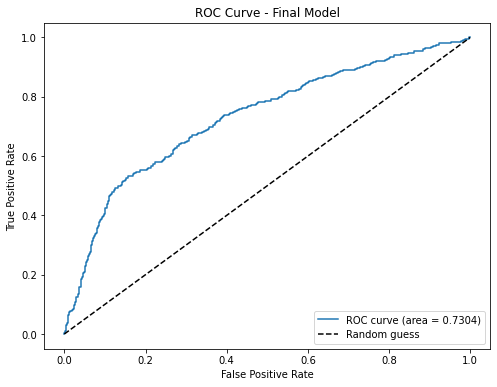

/home/jovyan/.virtualenvs/training_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/jovyan/.virtualenvs/training_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/jovyan/.virtualenvs/training_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/jovyan/.virtualenvs/training_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/jovyan/.virtualenvs/training_e

In [186]:
# Predict and evaluate
y_pred = logreg_pipeline.predict(X_test)
y_proba = None
if hasattr(logreg_pipeline.named_steps['classifier'], "predict_proba"):
    y_proba = logreg_pipeline.predict_proba(X_test)[:, 1]



print(classification_report(y_test, y_pred, digits=4))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Snow', 'Snow'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Model')
plt.show()

if y_proba is not None:
    auc = roc_auc_score(y_test, y_proba)
    print(f"ROC AUC Score: {auc:.4f}")

    

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Final Model')
plt.legend(loc='lower right')
plt.show()

#### Gridserach to find best paramters and imporve the model preformance

In [ ]:

param_grid = {
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': [0.01, 0.1, 1, 10]
}

grid_search_log = GridSearchCV(
    estimator=logreg_pipeline,
    param_grid=param_grid,
    cv=tscv,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

grid_search_log.fit(X_train_val, y_train_val)
print("Best params:", grid_search.best_params_)
print("Best F1 Macro score:", grid_search.best_score_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best params: {'classifier__C': 0.01, 'classifier__penalty': 'l1'}
Best F1 Macro score: 0.6724023287161381


In [188]:
# Predict on test data
y_pred = grid_search_log.predict(X_test)

# If you want probabilities (for ROC AUC or other metrics)
if hasattr(grid_search_log.best_estimator_.named_steps['classifier'], "predict_proba"):
    y_proba = grid_search_log.predict_proba(X_test)[:, 1]
else:
    y_proba = None


print(classification_report(y_test, y_pred))

if y_proba is not None:
    auc = roc_auc_score(y_test, y_proba)
    print(f"Test ROC AUC: {auc:.4f}")


              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1573
           1       0.51      0.50      0.50       446

    accuracy                           0.78      2019
   macro avg       0.68      0.68      0.68      2019
weighted avg       0.78      0.78      0.78      2019

Test ROC AUC: 0.7191


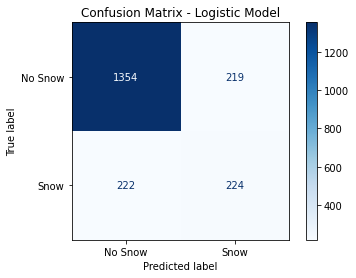

/home/jovyan/.virtualenvs/training_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/jovyan/.virtualenvs/training_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/jovyan/.virtualenvs/training_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/jovyan/.virtualenvs/training_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/jovyan/.virtualenvs/training_e

In [190]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Snow', 'Snow'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Model')
plt.show()

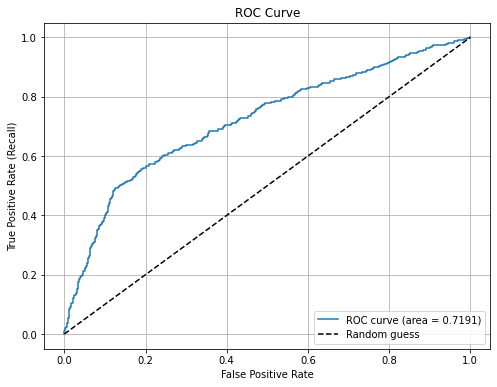

In [189]:
# Assuming y_test and y_proba are available
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_score:.4f})')
plt.plot([0,1], [0,1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

#### not so much imporvement from base logsitic regression model

#### Lets focus on Random Forest with Gridsearch

In [214]:
# Define the pipeline
rf_pipeline_grid = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

# Define the parameter grid
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [5, 10, 15, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}
# 3 × 4 × 3 × 3 = 108 combinations → 540 fits for 5 folds

# GridSearchCV
rf_grid_search = GridSearchCV(
    rf_pipeline_grid,
    param_grid,
    cv=tscv,
    scoring='f1_macro',  
    n_jobs=-1,
    verbose=1
)

# Fit the model
rf_grid_search.fit(X_train_val, y_train_val)

# Best results
print("✅ Best parameters for Random Forest:")
print(rf_grid_search.best_params_)
print(f"✅ Best F1 Macro Score: {rf_grid_search.best_score_:.4f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
✅ Best parameters for Random Forest:
{'classifier__max_depth': 15, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 300}
✅ Best F1 Macro Score: 0.6758


              precision    recall  f1-score   support

           0     0.8577    0.8697    0.8636      1573
           1     0.5165    0.4910    0.5034       446

    accuracy                         0.7860      2019
   macro avg     0.6871    0.6804    0.6835      2019
weighted avg     0.7823    0.7860    0.7841      2019



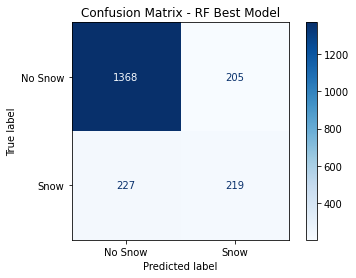

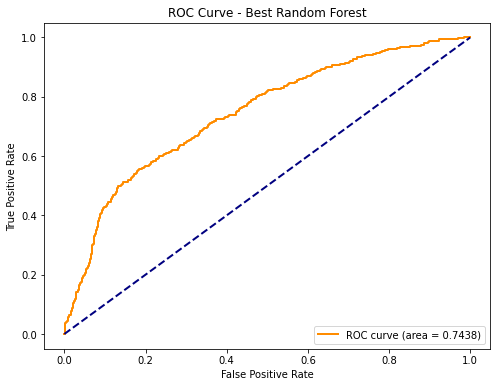

In [216]:
# Best model
best_rf_model = rf_grid_search.best_estimator_

# Predict
y_pred = best_rf_model.predict(X_test)

# Probabilities
y_proba = best_rf_model.predict_proba(X_test)[:, 1]

# Evaluation
print(classification_report(y_test, y_pred, digits=4))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Snow', 'Snow'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - RF Best Model')
plt.show()

# ROC Curve (optional)
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc_val = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_val:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title("ROC Curve - Best Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

#### overall it imporved slightly but not satisfactory

### Lets focus on XGB with Gridsearch

In [206]:
xgb_pipeline_balanced = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', XGBClassifier( eval_metric='logloss', random_state=42))
])
# Define parameter grid for XGBoost
param_grid = {
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__n_estimators': [100, 200],
    'classifier__scale_pos_weight': [1, np.sum(y_train_val == 0) / np.sum(y_train_val == 1)],  # imbalance ratio
    
}


# Use F1 score for imbalanced classes
scorer = make_scorer(f1_score, pos_label=1)  # focus on snow class

# Set up GridSearchCV
grid_search_xgb = GridSearchCV(
    xgb_pipeline_balanced,
    param_grid,
    cv=tscv,
    scoring=scorer,
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV on training + validation data
grid_search_xgb.fit(X_train_val, y_train_val)

# Best parameters and best score
print("Best parameters:", grid_search_xgb.best_params_)
print(f"Best F1 Score (snow class): {grid_search_xgb.best_score_:.4f}")

# Save best estimator for later use
best_xgb_model = grid_search_xgb.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=100; total time=   0.8s
[CV] END classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=200; total time=   0.1s
[CV] END classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=200; total time=   0.9s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=200; total time=   0.1s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=100; total time=   0.8s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__

In [208]:
best_xgb_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('median_impute',
                                                  SimpleImputer(strategy='median'),
                                                  ['mean_dew_point',
                                                   'mean_sealevel_pressure',
                                                   'mean_visibility',
                                                   'mean_wind_speed',
                                                   'max_sustained_wind_speed',
                                                   'max_gust_wind_speed',
                                                   'max_temperature_combined']),
                                                 ('zero_impute',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='co...
            

              precision    recall  f1-score   support

           0     0.8705    0.8118    0.8401      1573
           1     0.4638    0.5740    0.5130       446

    accuracy                         0.7593      2019
   macro avg     0.6671    0.6929    0.6766      2019
weighted avg     0.7806    0.7593    0.7679      2019



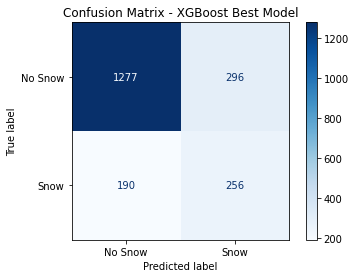

ROC AUC Score: 0.7627


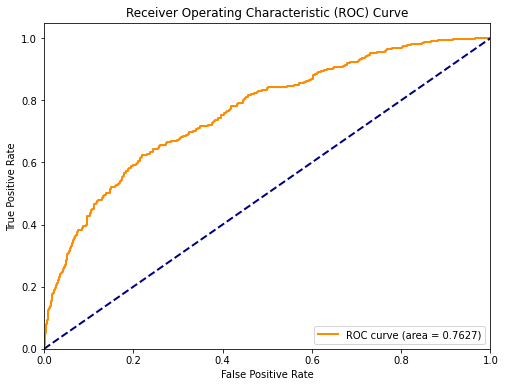

In [213]:

# Predict on test set
y_pred = best_xgb_model.predict(X_test)

# Get prediction probabilities for ROC AUC etc.
if hasattr(best_xgb_model.named_steps['classifier'], "predict_proba"):
    y_proba = best_xgb_model.predict_proba(X_test)[:, 1]
else:
    y_proba = None

# Classification report and confusion matrix
print(classification_report(y_test, y_pred, digits=4))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Snow', 'Snow'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - XGBoost Best Model')
plt.show()

# ROC AUC and curve
if y_proba is not None:
    roc_auc_score_val = roc_auc_score(y_test, y_proba)
    print(f"ROC AUC Score: {roc_auc_score_val:.4f}")
    
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc_val = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_val:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### overall XGBModel imporved interms of recall wich will hlep in predicitng the snowfall with confidence.

 * XGBoost model results show strong performance in predicting "No Snow" (class 0) with high precision and recall.
 * However, performance for "Snow" (class 1) is more modest, with lower precision but reasonable recall.
 * Overall ROC AUC of 0.76 indicates good model ability to distinguish between the two classes.
 * Imbalanced class distribution may still be affecting the snow class prediction.
